In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  # Requires installation: pip install xgboost
from boruta import BorutaPy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [8]:
# Load dataset
data = pd.read_csv(r"D:\study\project2\heart.csv")

# Split data into features and target
X = data.drop(columns=['target'])
y = data['target']

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Random Forest classifier for Boruta
rf_boruta = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Initialize Boruta feature selector
boruta_selector = BorutaPy(rf_boruta, n_estimators='auto', verbose=2, random_state=42)

# Fit Boruta feature selector
boruta_selector.fit(X_train.values, y_train.values)

# Get selected features
selected_features = X.columns[boruta_selector.support_].tolist()
print("\nSelected features:", selected_features)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	2
Rejected: 	2
Iteration:

In [10]:
# Transform training and testing data to include only selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [11]:
# Define multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "SVM": SVC(probability=True),  # Enable probability for ROC curve
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")  # Fix for newer versions
}


Training Logistic Regression...
Accuracy for Logistic Regression: 0.8344
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       150
           1       0.80      0.91      0.85       158

    accuracy                           0.83       308
   macro avg       0.84      0.83      0.83       308
weighted avg       0.84      0.83      0.83       308



<Figure size 1200x800 with 0 Axes>

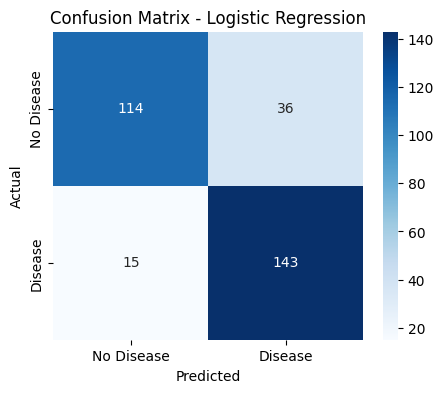


Training Random Forest...
Accuracy for Random Forest: 0.9805
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



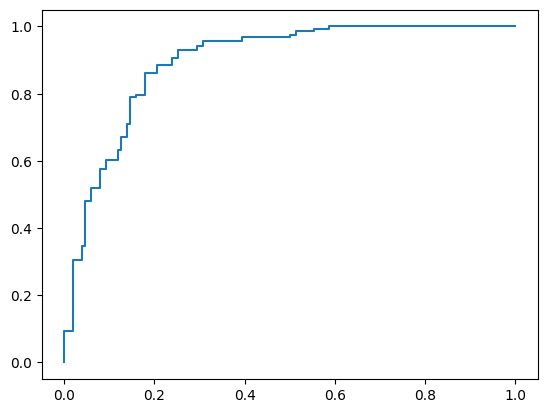

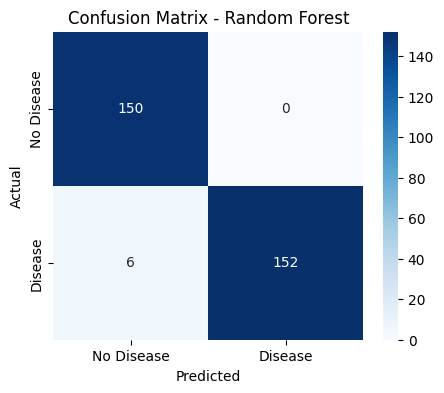


Training SVM...
Accuracy for SVM: 0.7240
              precision    recall  f1-score   support

           0       0.75      0.65      0.70       150
           1       0.70      0.80      0.75       158

    accuracy                           0.72       308
   macro avg       0.73      0.72      0.72       308
weighted avg       0.73      0.72      0.72       308



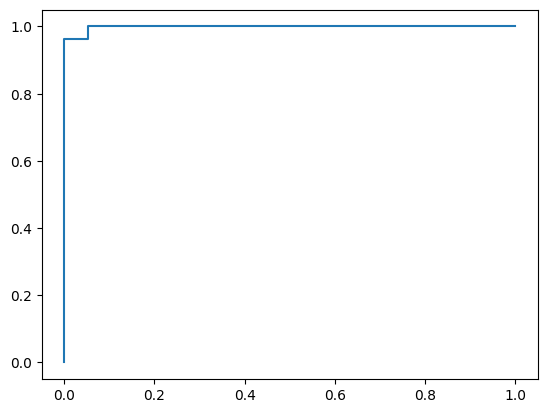

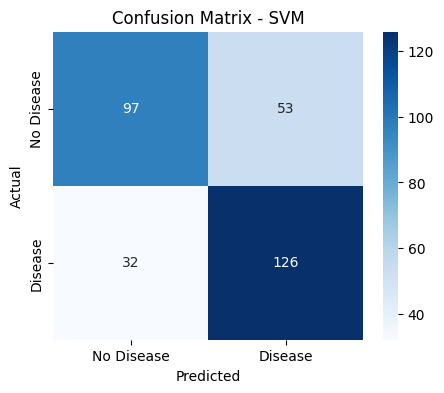


Training KNN...
Accuracy for KNN: 0.7013
              precision    recall  f1-score   support

           0       0.69      0.70      0.70       150
           1       0.71      0.70      0.71       158

    accuracy                           0.70       308
   macro avg       0.70      0.70      0.70       308
weighted avg       0.70      0.70      0.70       308



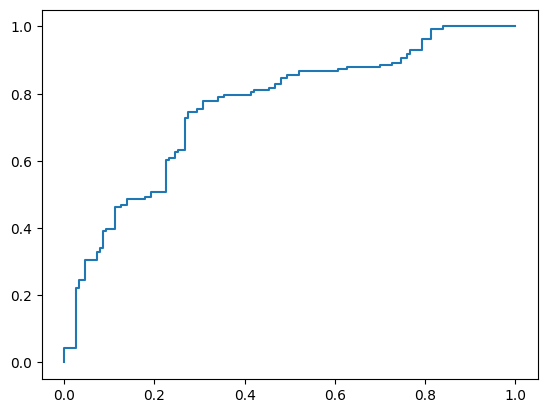

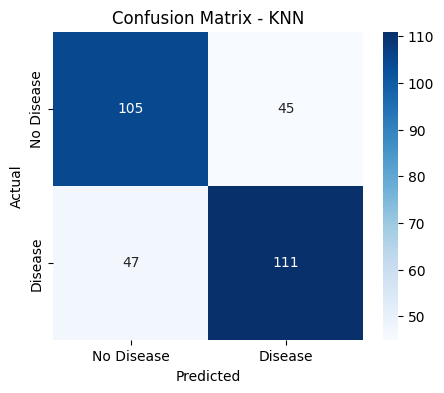


Training Gradient Boosting...
Accuracy for Gradient Boosting: 0.9545
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.97      0.94      0.95       158

    accuracy                           0.95       308
   macro avg       0.95      0.96      0.95       308
weighted avg       0.96      0.95      0.95       308



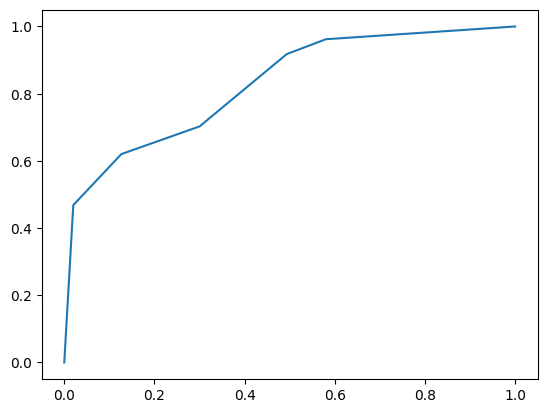

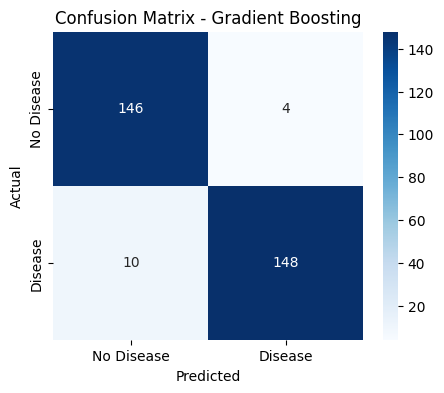


Training XGBoost...
Accuracy for XGBoost: 0.9805
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



d:\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


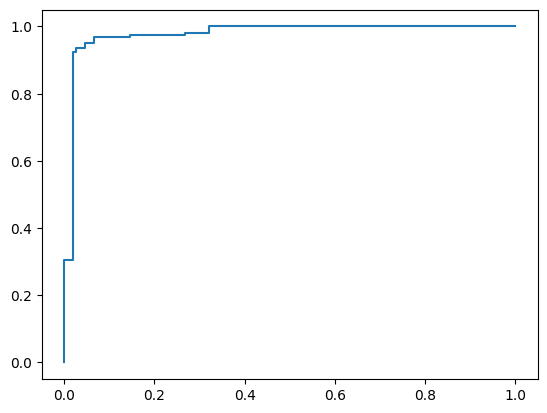

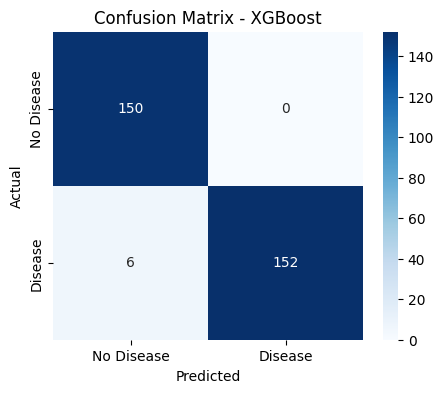

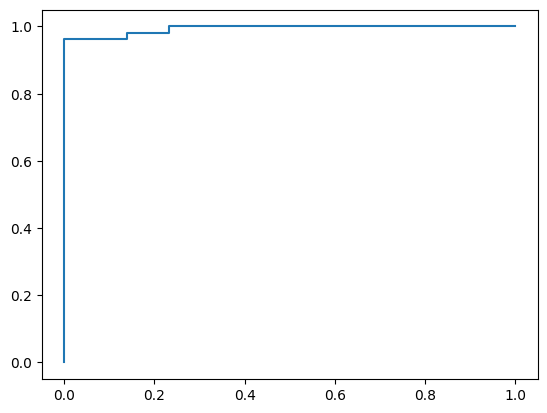

In [12]:
# Train and evaluate models
model_accuracies = {}
all_y_probs = {}
plt.figure(figsize=(12, 8))  # Set figure size for ROC curves

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_selected, y_train)  # Train model
    y_pred = model.predict(X_test_selected)  # Predict test data
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    model_accuracies[name] = acc
    print(f"Accuracy for {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))


    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # ROC Curve Data
    if hasattr(model, "predict_proba"):  # Check if model supports probability predictions
        y_probs = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities of class 1
        all_y_probs[name] = y_probs  # Store for later
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

C:\Users\asus\AppData\Local\Temp\ipykernel_18524\3982202625.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


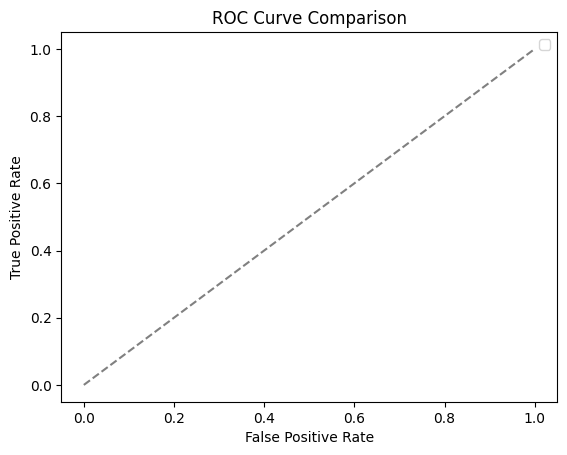

In [13]:
# ROC Curve Plot
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_18524\1284188507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")


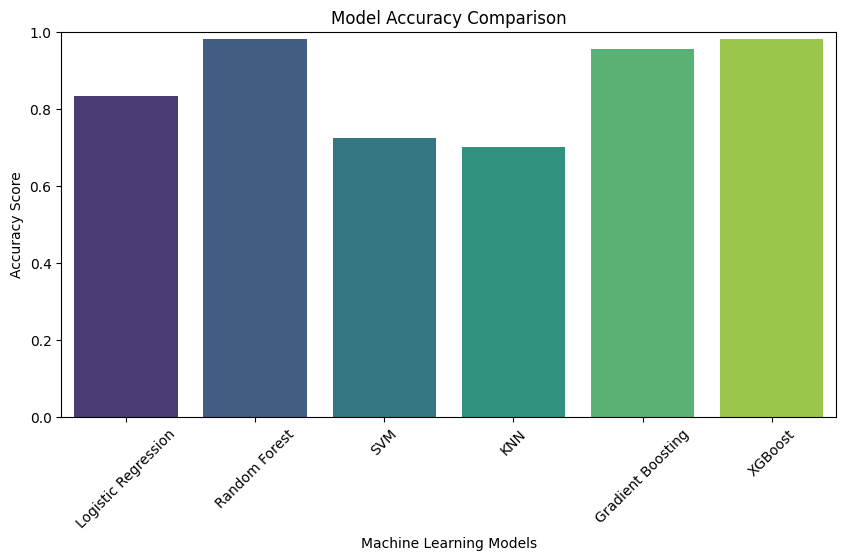

In [14]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette="viridis")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensure graph is in range of accuracy scores (0 to 1)
plt.show()